<a href="https://colab.research.google.com/github/vivianusdjpy/Supervised-Learning-with-Various-Regression-Techniques/blob/master/Supervised_Learning_using_various_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis:
# Mchezo Pesa Project

## 1. Defining the Question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

### a) Specifying the Question


Mchezo pesa is a football analyst company in East Africa. Mchezo-Pesa would like to predict the result of a game based whether the teams playing are in their home country or not and whether the game is friendly or not.



### b) Defining the Metric for Success
This project will be successful when:
1)We accurately predict the winning team based on the two factors:

       a)Home team or away team

       b)The type of tournament 

2)The model achieves atleast 80% accuracy

3)Have the lowest RMSE score possible


### c) Understanding the context 
The Coca-Cola ranking system was designed by FIFA and named 'SUM'.
This ranking method utilises a metric that adds or subtracts points to the previous score instead of finding the average score.
The lowest score which may be negative indicates the worst team while the highest score indicated the best team.

### d)Experimental Design
The project was undertaken using the following design
Datasets(Fifa-ranking.csv + results.csv)

Merging datasets

Performing EDA

Feature Engineering

Polynomial Regression

Logistic regression

Computing the RMSE

Plotting residual plots

Assess their heteroscedasticity using Barlette's test

Challenging the solution

Conclusion

### e) Data Relevance
The relavance of our data will be answered by the following questions.

How accurate is the data at predicting the outcome of the games?

Was the dataset sufficient?

Was the data biased?

Is the data source a reliable source?

## 2. Reading the Data

In [0]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
#loading the FiFa ranking dataset while specifying the datetime column
ranking = pd.read_csv('/content/fifa_ranking.csv', parse_dates=['rank_date'])
ranking.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [0]:
# Loading the FiFa results Dataset while specifying the datetime column
results = pd.read_csv('/content/results.csv',parse_dates=['date'])
results.head(5)
#

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## 3. Cleaning the Data

# Fifa Ranking Dataset

In [0]:
# Determining the no. of records in our dataset and the respective datatypes
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(3), object(3)
memory usage: 7.1+ MB


In [0]:
#checking for duplicates in the results column
ranking.duplicated().sum()

37

In [0]:
#dropping the duplicated columns in the ranking dataset
#keeping the first record of the duplicates
ranking.drop_duplicates(subset = None, keep = 'first', inplace = True)
ranking.shape

(57756, 16)

In [0]:
# Previewing the top of our dataset
ranking.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [0]:
# Previewing the bottom of our ranking dataset
ranking.tail(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [0]:
# Checking the properties of the ranking dataset
ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000
mean,101.618118,121.971151,332.339965,-0.009938,61.751362,61.751362,60.953507,30.476830,59.734768,17.920469,59.114466,11.822922
std,58.635096,260.479191,302.964176,5.802788,138.042006,138.042006,137.712945,68.856514,136.319119,40.895761,135.540135,27.108034
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,91.500000,525.000000,1.000000,30.447500,30.447500,26.400000,13.200000,21.250000,6.380000,20.795000,4.162500
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [0]:
#chosing the relevant columns to work with.
ranking_1 = ranking[["rank","country_full","confederation","rank_date"]]
ranking_1


,rank,country_full,confederation,rank_date
0,1,Germany,UEFA,1993-08-08
1,2,Italy,UEFA,1993-08-08
2,3,Switzerland,UEFA,1993-08-08
3,4,Sweden,UEFA,1993-08-08
4,5,Argentina,CONMEBOL,1993-08-08
...,...,...,...,...
57788,206,Anguilla,CONCACAF,2018-06-07
57789,206,Bahamas,CONCACAF,2018-06-07
57790,206,Eritrea,CAF,2018-06-07
57791,206,Somalia,CAF,2018-06-07


In [0]:
#creating a copy of ranking_1 dataset
ranking_2 = ranking_1
# Separate the date column into Year and Month of the fifa_ranking dataset
ranking_2['Year'] = ranking_1.rank_date.dt.year
ranking_2['month'] =ranking_1.rank_date.dt.month
ranking_2.head()

,rank,country_full,confederation,rank_date,Year,month
0,1,Germany,UEFA,1993-08-08,1993,8
1,2,Italy,UEFA,1993-08-08,1993,8
2,3,Switzerland,UEFA,1993-08-08,1993,8
3,4,Sweden,UEFA,1993-08-08,1993,8
4,5,Argentina,CONMEBOL,1993-08-08,1993,8


In [0]:
#creating a copy of the ranking_2 dataframe
ranking_3 =  ranking_2
#renaming the country_full column to home_team to merge with the results dataset and obtain the home team rank
ranking_3 = ranking_3.rename({'country_full': 'home_team'}, axis = 1)
ranking_3.columns

Index(['rank', 'home_team', 'confederation', 'rank_date', 'Year', 'month'], dtype='object')

In [0]:
#creating a copy of the ranking_2 dataframe
ranking_4 =  ranking_2
#renaming the country_full column to home_team to merge with the results dataset and obtain the away team rank
ranking_4 = ranking_4.rename({'country_full': 'away_team'}, axis = 1)
ranking_4.columns

Index(['rank', 'away_team', 'confederation', 'rank_date', 'Year', 'month'], dtype='object')

# Fifa Results Dataset

In [0]:
#previewing the top of the results dataset
results.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [0]:
#choosing the relevant columns in the results dataset
results = results[["date","home_team","away_team","home_score","away_score","tournament","country","neutral"]]
results

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False
...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,India,True


In [0]:
#checking for duplicates in the ranking column
results.duplicated().sum()

0

In [0]:
#checking for anomalies
#the results dataset has records before 1993 which we will drop since there are no corresponding records
#in the ranking dataset
results['date'].describe()

count                   40839
unique                  15115
top       2012-02-29 00:00:00
freq                       66
first     1872-11-30 00:00:00
last      2019-07-20 00:00:00
Name: date, dtype: object

In [0]:
#dropping the row entries before 1993 since they do not have corresponding records 
#in the ranking  dataframe.
results_1 = results
results_1 = results[results["date"] > '1993-01-01']
results_1.shape
#dropped 40839-23477 = 17362 row entries

(23477, 8)

In [0]:
#creating a copy of results_1 dataset
results_2 = results_1
# Separate the date column into Year and Month of the fifa_ranking dataset
results_2['Year'] = results_1.date.dt.year
results_2['month'] =results_1.date.dt.month
results_2.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month
17362,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,False,1993,1
17363,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,False,1993,1
17364,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Gabon,True,1993,1
17365,1993-01-03,Gabon,Ghana,2,3,Friendly,Gabon,False,1993,1
17366,1993-01-08,Uganda,Tanzania,3,1,Friendly,Uganda,False,1993,1


# Merging the Two datasets

In [0]:
## Merging the two datasets to obtain the home_team rank dataset : home_team, year and month
home_df = pd.merge(results_2, ranking_3, how='left', on = ['home_team', 'Year', 'month'])
home_df.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month,rank,confederation,rank_date
0,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,False,1993,1,NaN,NaN,NaT
1,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,False,1993,1,NaN,NaN,NaT
2,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Gabon,True,1993,1,NaN,NaN,NaT
3,1993-01-03,Gabon,Ghana,2,3,Friendly,Gabon,False,1993,1,NaN,NaN,NaT
4,1993-01-08,Uganda,Tanzania,3,1,Friendly,Uganda,False,1993,1,NaN,NaN,NaT


In [0]:
#renaming the rank column to obtaing the home_team_rank
home_df = home_df.rename({'rank': 'home_team_rank'}, axis = 1)
home_df.head(5)


,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month,home_team_rank,confederation,rank_date
0,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,False,1993,1,NaN,NaN,NaT
1,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,False,1993,1,NaN,NaN,NaT
2,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Gabon,True,1993,1,NaN,NaN,NaT
3,1993-01-03,Gabon,Ghana,2,3,Friendly,Gabon,False,1993,1,NaN,NaN,NaT
4,1993-01-08,Uganda,Tanzania,3,1,Friendly,Uganda,False,1993,1,NaN,NaN,NaT


In [0]:
## Merging the two datasets to obtain the away_team rank dataset : home_team, year and month
away_df = pd.merge(results_2, ranking_4, how='left', on = ['away_team', 'Year', 'month'])
away_df.head()


,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month,rank,confederation,rank_date
0,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,False,1993,1,NaN,NaN,NaT
1,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,False,1993,1,NaN,NaN,NaT
2,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Gabon,True,1993,1,NaN,NaN,NaT
3,1993-01-03,Gabon,Ghana,2,3,Friendly,Gabon,False,1993,1,NaN,NaN,NaT
4,1993-01-08,Uganda,Tanzania,3,1,Friendly,Uganda,False,1993,1,NaN,NaN,NaT


In [0]:
#renaming the rank column to obtaing the away_team_rank
away_df = away_df.rename({'rank': 'away_team_rank'}, axis = 1)
away_df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,Year,month,away_team_rank,confederation,rank_date
0,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Gabon,False,1993,1,NaN,NaN,NaT
1,1993-01-02,Kuwait,Lebanon,2,0,Friendly,Kuwait,False,1993,1,NaN,NaN,NaT
2,1993-01-03,Burkina Faso,Mali,1,0,Friendly,Gabon,True,1993,1,NaN,NaN,NaT
3,1993-01-03,Gabon,Ghana,2,3,Friendly,Gabon,False,1993,1,NaN,NaN,NaT
4,1993-01-08,Uganda,Tanzania,3,1,Friendly,Uganda,False,1993,1,NaN,NaN,NaT


In [0]:
#obtaining the final dataset for modelling
final_df = pd.merge(home_df, away_df, how = 'inner', left_on = ['Year', 'month','away_team'], right_on = ['Year', 'month','away_team'])
final_df.shape


(41349, 23)

In [0]:
#obtaining information and corresponding datatypes of the merged dataset
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41349 entries, 0 to 41348
Data columns (total 23 columns):
date_x             41349 non-null datetime64[ns]
home_team_x        41349 non-null object
away_team          41349 non-null object
home_score_x       41349 non-null int64
away_score_x       41349 non-null int64
tournament_x       41349 non-null object
country_x          41349 non-null object
neutral_x          41349 non-null bool
Year               41349 non-null int64
month              41349 non-null int64
home_team_rank     31675 non-null float64
confederation_x    31675 non-null object
rank_date_x        31675 non-null datetime64[ns]
date_y             41349 non-null datetime64[ns]
home_team_y        41349 non-null object
home_score_y       41349 non-null int64
away_score_y       41349 non-null int64
tournament_y       41349 non-null object
country_y          41349 non-null object
neutral_y          41349 non-null bool
away_team_rank     31452 non-null float64
confederation_

## 5. Tidying the Dataset

In [0]:
## Identifying the Missing Data
final_df.isnull().sum()
#there are 9897 missing records in three columns(rank, confederation and rank_date)

date_x                0
home_team_x           0
away_team             0
home_score_x          0
away_score_x          0
tournament_x          0
country_x             0
neutral_x             0
Year                  0
month                 0
home_team_rank     9674
confederation_x    9674
rank_date_x        9674
date_y                0
home_team_y           0
home_score_y          0
away_score_y          0
tournament_y          0
country_y             0
neutral_y             0
away_team_rank     9897
confederation_y    9897
rank_date_y        9897
dtype: int64

In [0]:
# Dealing with the Missing Data
final_df1 = final_df.dropna()
final_df1.isnull().sum()
#dropped the [ 41349-28439 = 12910 ]null values
final_df1.shape

(28439, 23)

In [0]:
#previewing the data
final_df1.head(5)

,date_x,home_team_x,away_team,home_score_x,away_score_x,tournament_x,country_x,neutral_x,Year,month,home_team_rank,confederation_x,rank_date_x,date_y,home_team_y,home_score_y,away_score_y,tournament_y,country_y,neutral_y,away_team_rank,confederation_y,rank_date_y
1224,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,CONMEBOL,1993-08-08,1993-08-01,Colombia,0,0,FIFA World Cup qualification,Colombia,False,67.0,CONMEBOL,1993-08-08
1225,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,CONMEBOL,1993-08-08,1993-08-29,Argentina,0,0,FIFA World Cup qualification,Argentina,False,67.0,CONMEBOL,1993-08-08
1226,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,1993,8,5.0,CONMEBOL,1993-08-08,1993-08-01,Colombia,0,0,FIFA World Cup qualification,Colombia,False,67.0,CONMEBOL,1993-08-08
1227,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,1993,8,5.0,CONMEBOL,1993-08-08,1993-08-29,Argentina,0,0,FIFA World Cup qualification,Argentina,False,67.0,CONMEBOL,1993-08-08
1228,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993,8,70.0,CONMEBOL,1993-08-08,1993-08-01,Peru,0,1,FIFA World Cup qualification,Peru,False,5.0,CONMEBOL,1993-08-08


In [0]:
# Checking the columns
final_df1.columns

Index(['date_x', 'home_team_x', 'away_team', 'home_score_x', 'away_score_x',
       'tournament_x', 'country_x', 'neutral_x', 'Year', 'month',
       'home_team_rank', 'confederation_x', 'rank_date_x', 'date_y',
       'home_team_y', 'home_score_y', 'away_score_y', 'tournament_y',
       'country_y', 'neutral_y', 'away_team_rank', 'confederation_y',
       'rank_date_y'],
      dtype='object')

In [0]:
#dropping irrelevant columns
final_df2 = final_df1
final_df2 = final_df1.drop(['date_y','home_team_y', 'home_score_y', 'away_score_y', 'tournament_y',
       'country_y', 'neutral_y', 'confederation_y', 'rank_date_y','date_x','confederation_x','rank_date_x'], axis=1)
final_df2.head(5)

,home_team_x,away_team,home_score_x,away_score_x,tournament_x,country_x,neutral_x,Year,month,home_team_rank,away_team_rank
1224,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,67.0
1225,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,67.0
1226,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,1993,8,5.0,67.0
1227,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,1993,8,5.0,67.0
1228,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993,8,70.0,5.0


In [0]:
#making the columns uniform
#renaming the column names and changing them to uppercase
#creating a copy
final_df3 = final_df2
final_df3.rename(columns={'home_team_x':'HOME_TEAM','away_team':'AWAY_TEAM','neutral_x':'NEUTRAL','home_score_x':'HOME_SCORE','away_score_x':'AWAY_SCORE','tournament_x':'TOURNAMENT','country_x':'COUNTRY','Year':'YEAR','month':'MONTH','home_team_rank':'HOME_TEAM_RANK','confederation_x':'CONFEDERATION','away_team_rank':'AWAY_TEAM_RANK'}, inplace=True)
final_df3.head(5)


,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,TOURNAMENT,COUNTRY,NEUTRAL,YEAR,MONTH,HOME_TEAM_RANK,AWAY_TEAM_RANK
1224,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,67.0
1225,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,False,1993,8,19.0,67.0
1226,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,1993,8,5.0,67.0
1227,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False,1993,8,5.0,67.0
1228,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False,1993,8,70.0,5.0


In [0]:
#checking the dimensions of the resultant dataset
final_df3.shape

(28439, 11)

In [0]:
#checking the unique values in the tournament column
#we need to have 3: FIFA worldcup,Friendly and others
final_df3.TOURNAMENT.unique()

array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament',
       'CFU Caribbean Cup qualification', 'African Cup of Nations',
       'CFU Caribbean Cup', 'UEFA Euro qualification', 'Kirin Cup',
       'FIFA World Cup', 'Oceania Nations Cup qualification',
       'Baltic Cup', 'Gulf Cup', 'Simba Tournament', 'CECAFA Cup',
       'Dynasty Cup', "King's Cup", 'SAFF Cup', 'Copa Paz del Chaco',
       'Korea Cup', 'USA Cup', 'Copa América', 'Merdeka Tournament',
       'South Pacific Games', 'UNCAF Cup', 'Oceania Nations Cup',
       'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'Lunar New Year Cup',
       'AFF Championship', 'AFC Asian Cup', 'King Hassan II Tournament',
       'Dunhill Cup', 'Cyprus International Tournament', 'Nehru Cup',
       'COSAFA Cup', 'Tournoi de France', 'Confederations Cup',

In [0]:
#converting the tournament column to 3categories(Worldcup, friendly and other matches)
## Converting the tournament columns to: World cup, Friendly and others
def TOURNAMENT(GAMES):
    if (GAMES == 'FIFA World Cup qualification') or (GAMES == 'FIFA World Cup'):
        return 'World_Cup'
    if GAMES == 'Friendly':
        return 'Friendly'
    else:
        return 'Other Matches'
# Applying the function above
#creating a copy
final_df4 = final_df3
final_df4['GAMES'] = final_df4['TOURNAMENT'].apply(lambda w: TOURNAMENT(w))
final_df4['GAMES'].unique()

array(['World_Cup', 'Friendly', 'Other Matches'], dtype=object)

In [0]:
#Converting the neutral categorical variable to numerical variable
#Using dummy indicators
#creating a copy
final_df5 = final_df4
final_df5['NEUTRAL'] = pd.get_dummies(final_df5['NEUTRAL'], drop_first=True)
final_df5.NEUTRAL.unique()

array([0, 1], dtype=uint64)

# Feature Engineering

In [0]:
#creating a copy
final_df6 = final_df5
#creating a column(final_score) that shows whether the match ended in a win, loss or draw
final_df6['FINAL_SCORE'] = final_df6['HOME_SCORE'] - final_df6['AWAY_SCORE']
def HOME_TEAM(home_score):
    if home_score > 0:
        return 'Win'
    elif home_score < 0:
        return 'Loss'
    else:
        return 'Draw'
      
final_df6['OUTCOME'] = final_df6.FINAL_SCORE.apply(lambda h: HOME_TEAM(h))
final_df6.head(5)

,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,COUNTRY,NEUTRAL,YEAR,MONTH,HOME_TEAM_RANK,AWAY_TEAM_RANK,GAMES,FINAL_SCORE,OUTCOME
1224,Colombia,Paraguay,0,0,Colombia,0,1993,8,19.0,67.0,World_Cup,0,Draw
1225,Colombia,Paraguay,0,0,Colombia,0,1993,8,19.0,67.0,World_Cup,0,Draw
1226,Argentina,Paraguay,0,0,Argentina,0,1993,8,5.0,67.0,World_Cup,0,Draw
1227,Argentina,Paraguay,0,0,Argentina,0,1993,8,5.0,67.0,World_Cup,0,Draw
1228,Peru,Argentina,0,1,Peru,0,1993,8,70.0,5.0,World_Cup,0,Draw


In [0]:
final_df6['OUTCOME'].unique()

array(['Draw', 'Loss', 'Win'], dtype=object)

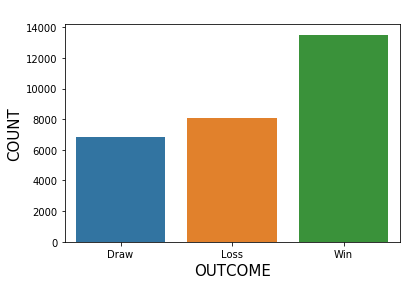

In [0]:
# visualizing the win draw and lose on a bar plot
sb.countplot('OUTCOME',data = final_df6)
plt.xlabel("OUTCOME",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of OUTCOME",fontsize=16,color="white")
plt.show()
#generally, there is a high probability to win a match than lose or draw

In [0]:
#dropping the tournament column
final_df7 = final_df6
final_df7.drop(columns=['TOURNAMENT'], inplace=True)
final_df7.head(5)

,HOME_TEAM,AWAY_TEAM,HOME_SCORE,AWAY_SCORE,COUNTRY,NEUTRAL,YEAR,MONTH,HOME_TEAM_RANK,AWAY_TEAM_RANK,GAMES,FINAL_SCORE,OUTCOME
1224,Colombia,Paraguay,0,0,Colombia,0,1993,8,19.0,67.0,World_Cup,0,Draw
1225,Colombia,Paraguay,0,0,Colombia,0,1993,8,19.0,67.0,World_Cup,0,Draw
1226,Argentina,Paraguay,0,0,Argentina,0,1993,8,5.0,67.0,World_Cup,0,Draw
1227,Argentina,Paraguay,0,0,Argentina,0,1993,8,5.0,67.0,World_Cup,0,Draw
1228,Peru,Argentina,0,1,Peru,0,1993,8,70.0,5.0,World_Cup,-1,Loss


## 6. Exploratory Analysis

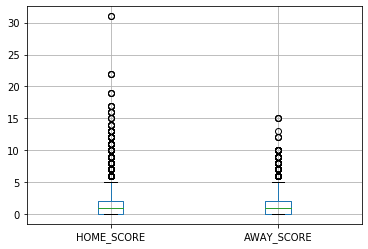

In [0]:
# Ploting the univariate summaries and recording our observations
## Checking for outliers in the Home_score and Away_score column
boxplot = final_df7.boxplot(column=['HOME_SCORE','AWAY_SCORE'])
## From the boxplots,both the home score and away score columns have outliers.
## The outliers will not be dropped, since they are importamt and did not happen by chance

# 7. Implementing the Solution

## Checking for Multi-collinearity

In [0]:
# Let's display the correlations between the variables
corr = final_df7[['HOME_SCORE','AWAY_SCORE','HOME_TEAM_RANK','AWAY_TEAM_RANK'	]].corr()
corr

,HOME_SCORE,AWAY_SCORE,HOME_TEAM_RANK,AWAY_TEAM_RANK
HOME_SCORE,1.000000,-0.161033,-0.114510,0.307728
AWAY_SCORE,-0.161033,1.000000,0.221365,-0.151487
HOME_TEAM_RANK,-0.114510,0.221365,1.000000,0.515308
AWAY_TEAM_RANK,0.307728,-0.151487,0.515308,1.000000


##### The table above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Let's use these correlations to compute the VIF(Variance Inflation Factor) score for each variable.We create a new dataframe with the inverse of the matrix above.



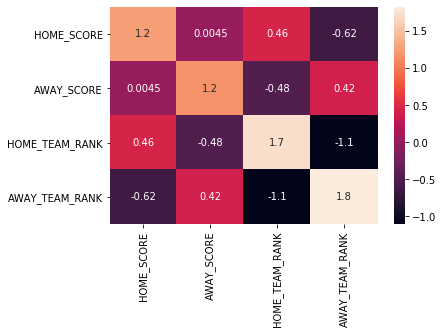

In [0]:
#computing the VIF(which is the inverse of the correlation matrix)
VIF_df = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
sb.heatmap(VIF_df, annot = True)
plt.show()

##### The heat map above shows VIF values that are very close to 0 meaning that there is very little multi-collinearity.

# Regression


# 1st Approach: Polynomial Regression

### Model 1: Predicting the Home_score

In [0]:
#importing necessary libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#defining X and y using the column locations
X = final_df7.iloc[:, [0,1,3,8,9,10,11,12]]
y = final_df7['HOME_SCORE'].values

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_pred = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
# Let's describe our residual:
pd.DataFrame(residuals).describe()
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The residual mean score for the model : ", residuals.mean())


The RMSE score for the model :  1.3530637589453456
The residual mean score for the model :  0.025063874005336932


The RMSE score for the model is quite high hence low predictive capability

## Checking for Heteroskedasticity using Barlette's Test

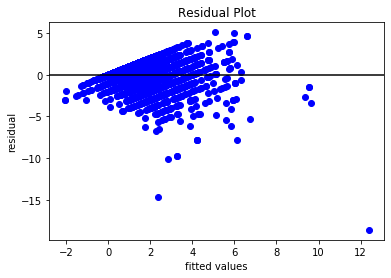

In [0]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black')
plt.show()

## Model 2: Predicting the Away_Score

In [0]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = final_df7.iloc[:, [0,1,2,8,9,10,11,12]]
y = final_df7['AWAY_SCORE'].values

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_pred = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
# Let's describe our residual:
pd.DataFrame(residuals).describe()
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The residual mean score for the model : ", residuals.mean())


The RMSE score for the model :  1.1130505457819098
The residual mean score for the model :  -0.022723320765105755


The RMSE score for the model is quite high hence low predictive capability

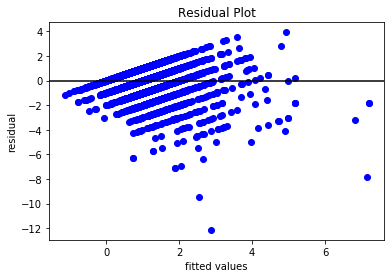

In [0]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='blue')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black')
plt.show()

# 2nd Approach: Logistic Regression

In [0]:
# Testing my model with several classiffiers to see the better classifier
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Several list of classifiers
classifier = []
classifier.append(('Logistic Regression ', LogisticRegression(solver='liblinear', multi_class='ovr')))
classifier.append(('Random Forest ', RandomForestClassifier()))
classifier.append(('GussianNB ', GaussianNB()))
#classifier.append(('SVM ', SVC(gamma='auto')))

res = []
names = []

# Implementing cross valiadtaion
for name, model in classifier:
   kfold = KFold(n_splits=5, random_state=0)
   cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
   res.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)
    
## We can see that logistic reggresion has the highest accuracy.
## thus we use it for classification modelling

Logistic Regression : 0.428465 (0.006814)
Random Forest : 0.711661 (0.006001)
GussianNB : 0.119643 (0.005638)


In [0]:
# Using critical value to find the heteroskedasticity
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

## comparing the critical value and the test result
if (test_result > critical_value):
 print('the variances are unequal, and the model should be reassessed')
else:
 print('the variances are homogeneous!')

inf
the variances are homogeneous!


There are no patterns to explain the variances in the data.
The features are independent.

## 9. Follow up questions

### a). Did we have the right data?
NO!

### b). Do we need other data to answer our question?
YES! More conclusive features should be included.

### c). Did we have the right question?

YES!
Football is  greatly loved sport and predicting the outcome of a match based on previous outcomes is an interesting challenge.

#Conclusion

Polynomial Regression and Logistic Regression do not yield an accurate model to predict the FIFA outcomes hence other Modelling techniques should be considered